In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#
%matplotlib inline
from scipy.signal import argrelmin, argrelmax
from scipy.interpolate import UnivariateSpline
import csv
from scipy import stats

In [2]:
headervalues = ['Vg_set', 'Vtg_set', 'B_set', 'Vd_set', 'Vg', 'Vtg', 
                'Vd', 'Id', 'Vac_real_raw', 'Iac_real_raw', 
                'Vac_imag_raw', 'Iac_imag_raw', 'Vac_R_raw', 
                'Iac_R_raw', 'Vac_p_raw', 'Iac_p_raw', 'Rac', 
                'Rac_inphase', 'G_inphase', 'timestamp']

In [3]:
data = pd.read_csv('data.dat', header=None, delimiter='\t')
data.columns = headervalues

In [4]:
data.head()

,Vg_set,Vtg_set,B_set,Vd_set,Vg,Vtg,Vd,Id,Vac_real_raw,Iac_real_raw,Vac_imag_raw,Iac_imag_raw,Vac_R_raw,Iac_R_raw,Vac_p_raw,Iac_p_raw,Rac,Rac_inphase,G_inphase,timestamp
0,6,0,-0.00832,0.600,5.999998,0.000003,-0.000137,-0.000002,-0.00001,-0.000111,-2.868492e-07,0.000022,0.00001,0.000113,1.617385,-11.232985,91.547039,92.136713,280.157677,1.505138e+09
1,6,0,-0.00832,0.596,5.999998,-0.000003,-0.000136,-0.000002,-0.00001,-0.000108,-1.490127e-08,0.000024,0.00001,0.000111,0.084757,-12.585224,93.132336,93.163308,277.070536,1.505138e+09
2,6,0,-0.00832,0.592,5.999998,0.000006,-0.000135,-0.000002,-0.00001,-0.000106,2.421457e-07,0.000029,0.00001,0.000110,-1.398232,-15.405818,93.288165,92.720116,278.394900,1.505138e+09
3,6,0,-0.00832,0.588,6.000001,0.000003,-0.000134,-0.000002,-0.00001,-0.000109,-1.676390e-07,0.000025,0.00001,0.000112,0.965929,-12.738068,91.223065,91.598113,281.805013,1.505138e+09
4,6,0,-0.00832,0.584,5.999998,0.000003,-0.000133,-0.000002,-0.00001,-0.000106,-2.160677e-07,0.000023,0.00001,0.000109,1.260475,-12.397316,92.413585,92.907682,277.832866,1.505138e+09


In [5]:
bvalues = np.unique(data['B_set'].values)

In [6]:
data[data['B_set'] == bvalues[0]]['Id'].values[0], data[data['B_set'] == bvalues[0]]['Id'].values[-1]

(-1.599291116667e-06, 1.5495934333329999e-06)

In [7]:
data[data['B_set'] == bvalues[0]]['Vd'].values[0], data[data['B_set'] == bvalues[0]]['Vd'].values[-1]

(-0.00013699088266670001, 0.0001478684866667)

#### Remove double data for index bvalues[100]

In [8]:
data.drop(data[data['B_set'] == bvalues[100]].index[:301], inplace=True)

#### Determine offset

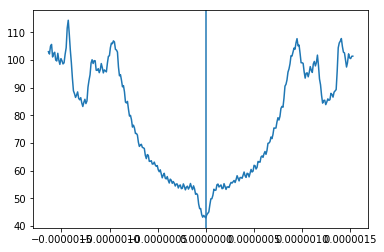

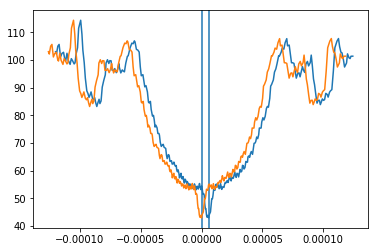

In [9]:
bval = bvalues[185]
idrain = data[data['B_set'] == bval]['Id'].values
vdrain = data[data['B_set'] == bval]['Vd'].values 
rac = data[data['B_set'] == bval]['Rac'].values #?flip or not flip?

id_offset = idrain[argrelmin(rac, order=50)[0][0]]
vd_offset = vdrain[argrelmin(rac, order=50)[0][0]]
             
fig0, ax0 = plt.subplots()
#ax0.plot(idrain, rac)
#ax0.axvline(idrain[argrelmin(rac, order=50)[0][0]])
ax0.axvline((idrain - id_offset * np.ones(len(idrain)))[argrelmin(rac, order=50)[0][0]])
ax0.plot(idrain - id_offset * np.ones(len(idrain)), rac)


fig1, ax1 = plt.subplots()
ax1.plot(vdrain, rac)
ax1.axvline(vdrain[argrelmin(rac, order=50)[0][0]])
ax1.axvline((vdrain - vd_offset * np.ones(len(idrain)))[argrelmin(rac, order=50)[0][0]])
ax1.plot(vdrain - vd_offset * np.ones(len(idrain)), rac)


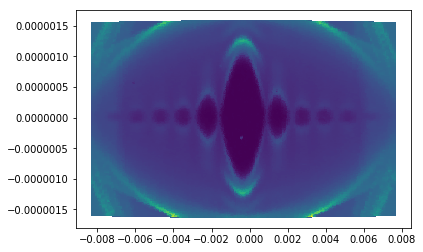

In [11]:
x = data['B_set']
y = data['Id']
z = data['Rac']

plt.tripcolor(x, y, z)

data['Vd'] = data['Vd'].add(-vd_offset)
data['Id'] = data['Id'].add(-id_offset)

x = data_edited['B_set']
y = data_edited['Id']
z = data_edited['Rac']

plt.tripcolor(x, y, z)

x = data_edited['B_set']
y = data_edited['Vd']
z = data_edited['Rac']

plt.tripcolor(x, y, z)

In [10]:
from scipy.ndimage.filters import median_filter
from scipy.signal import medfilt

In [ ]:
rac_threshold = [data[data['B_set'] == bval]['Rac'].values[0] for bval in bvalues]

In [19]:
def find_peaks(spline, derivative, current, ordervalue, maxvalue=False):
        
    all_minima = argrelmin(np.abs(derivative(current)), order=ordervalue)[0]
    middle = np.argmin(np.abs(all_minima - zero_current_ix * np.ones(len(all_minima))))
    
    fig, ax = plt.subplots()
    #ax.plot(current, spline(current))
    ax.plot(current, np.abs(derivative(current)))
    ax.axvline(current[zero_current_ix + middle])
    for value in all_minima[middle:]:
        ax.axvline(current[zero_current_ix + value])
    fig.show()
    
    if maxvalue:
        return max(zip(all_minima[middle:], [spline(current[minval]) for minval in all_minima[middle:]]), 
                   key=lambda x: x[1])[0]
    #for bindex between 0, 60:
    else:
        try:
            return int(all_minima[middle:][1])
        except IndexError:
            return int(all_minima[middle:][0])

In [12]:
def get_params(index):
    if index in range(0, 70) or index in range(130, 202):
        #cutoff, order, findpeaks
        params = (10e-6, 10, False)
    else:
        params = (25e-6, 10, False)

In [427]:
result = []


In [ ]:
start, stop = 150, 202
co, order, maxvalue = 10e-6, 10, False # start, stop in (0, 70) or (130, 200)
#co, order, maxvalue = 25e-6, 10, True # start, stop in (70, 130)

query = '-{lowerbound} < Vd < {upperbound}'.format(lowerbound=co, upperbound=co)

data_edited = data.copy()
data_edited['Vd'] = data_edited['Vd'].add(- vd_offset)
data_edited['Id'] = data_edited['Id'].add(- id_offset)
data_edited = data_edited.query(query)


for bindex, bval in enumerate(bvalues[start:stop]):  
    idrain = data_edited[data_edited['B_set'] == bval]['Id'].values
    rac = data_edited[data_edited['B_set'] == bval]['Rac'].values
    zero_current_ix = np.argmin(np.abs(idrain))

    spline = UnivariateSpline(idrain, medfilt(rac), s=50)
    derivative = spline.derivative()

    try:
        right_peak = find_peaks(spline, derivative, idrain,  order,  maxvalue)
    except IndexError:
        result.append(0)
        continue
    rac_max = spline(idrain[right_peak]) * np.ones(len(idrain))
    rac_min = spline(idrain[zero_current_ix]) * np.ones(len(idrain))
    rac_half = (rac_max + rac_min) / 2   

    rac_half_ix = zero_current_ix + np.argmin(np.abs(rac_half - spline(idrain))[zero_current_ix:])
    idrain_half = idrain[rac_half_ix]
    result.append(idrain_half)
"""
    fig, ax = plt.subplots()
    ax.plot(idrain, rac, label='data')
    ax.plot(idrain, medfilt(rac), label='medfilt')
    ax.plot(idrain, spline(idrain), label='spline')
    ax.axvline(idrain[zero_current_ix])
    ax.axvline(idrain[right_peak])
    ax.legend()

    #ax.vlines()    
   """ 

In [434]:
#pd.DataFrame(result).to_csv('data-ic-extract.csv')

In [ ]:
colorplot = []
for bval in bvalues:
    rac = np.flip(data[data['B_set'] == bval]['Rac'].values, 0)
    colorplot.append(list(rac))
    
y, x = np.meshgrid(data[data['B_set'] == bvalues[185]]['Id'], bvalues)
fig, ax = plt.subplots(figsize=(16, 9))
ax.pcolor(x, y, colorplot,  vmin=0.0, vmax=200)
ax.plot(bvalues, result - id_offset*np.ones(len(result)), color='r', marker='o')
fig.savefig('ic-extract.png')

"\n    fig, ax = plt.subplots()\n    ax.plot(idrain, rac, label='data')\n    ax.plot(idrain, medfilt(rac), label='medfilt')\n    ax.plot(idrain, spline(idrain), label='spline')\n    ax.axvline(idrain[zero_current_ix])\n    ax.axvline(idrain[right_peak])\n    ax.legend()\n    fig.show()\n    #ax.vlines()    \n"

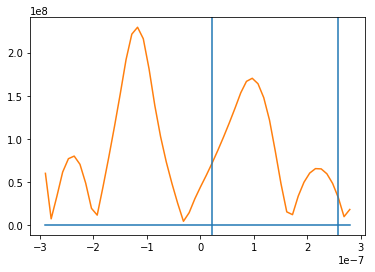

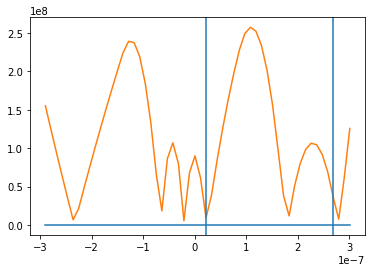

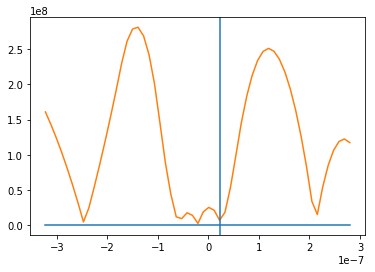

In [20]:
result = []
start, stop = 146, 149
co, order, maxvalue = 10e-6, 1, True # start, stop in (0, 70) or (130, 200)
#co, order, maxvalue = 25e-6, 10, True # start, stop in (70, 150)

query = '-{lowerbound} < Vd < {upperbound}'.format(lowerbound=co, upperbound=co)

data_edited = data.copy()
data_edited['Vd'] = data_edited['Vd'].add(- vd_offset)
data_edited['Id'] = data_edited['Id'].add(- id_offset)
data_edited = data_edited.query(query)


for bindex, bval in enumerate(bvalues[start:stop]):  
    idrain = data_edited[data_edited['B_set'] == bval]['Id'].values
    rac = data_edited[data_edited['B_set'] == bval]['Rac'].values
    zero_current_ix = np.argmin(np.abs(idrain))

    spline = UnivariateSpline(idrain, medfilt(rac), s=50)
    derivative = spline.derivative()

    try:
        right_peak = find_peaks(spline, derivative, idrain,  order,  maxvalue)
    except IndexError:
        result.append(0)
        continue
    rac_max = spline(idrain[right_peak]) * np.ones(len(idrain))
    rac_min = spline(idrain[zero_current_ix]) * np.ones(len(idrain))
    rac_half = (rac_max + rac_min) / 2   

    rac_half_ix = zero_current_ix + np.argmin(np.abs(rac_half - spline(idrain))[zero_current_ix:])
    idrain_half = idrain[rac_half_ix]
    result.append(idrain_half)
"""
    fig, ax = plt.subplots()
    ax.plot(idrain, rac, label='data')
    ax.plot(idrain, medfilt(rac), label='medfilt')
    ax.plot(idrain, spline(idrain), label='spline')
    ax.axvline(idrain[zero_current_ix])
    ax.axvline(idrain[right_peak])
    ax.legend()
    fig.show()
    #ax.vlines()    
""" 

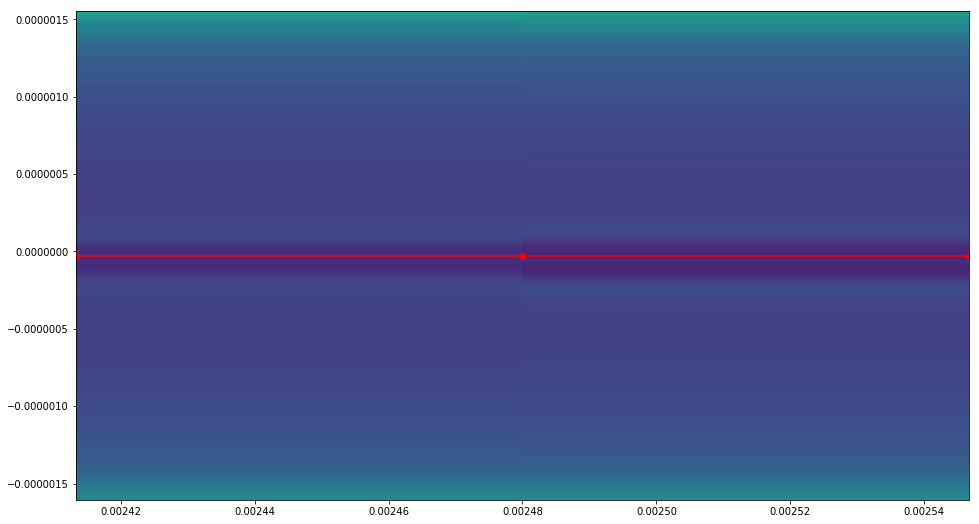

In [51]:
colorplot = []
for bval in bvalues[start:stop]:
    rac = np.flip(data[data['B_set'] == bval]['Rac'].values, 0)
    colorplot.append(list(rac))
    

y, x = np.meshgrid(data[data['B_set'] == bvalues[185]]['Id'], bvalues[start:stop])
fig, ax = plt.subplots(figsize=(16, 9))
ax.pcolor(x, y, colorplot,  vmin=0.0, vmax=200)
ax.plot(bvalues[start:stop], result - id_offset*np.ones(len(result)), color='r', marker='o')

[43 52]
[29 44 53]


/home/nefta/.virtualenvs/kwant/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[32 50]


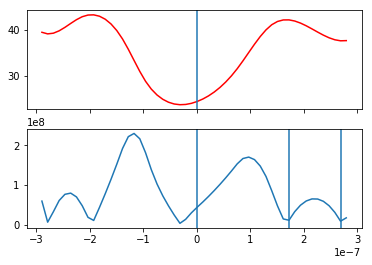

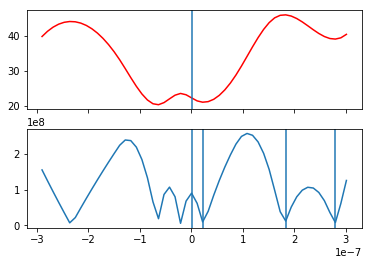

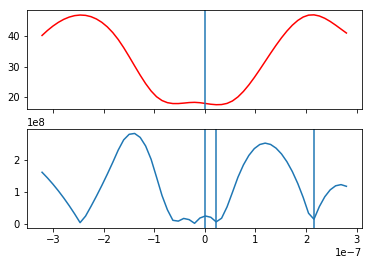

In [36]:
result = []
start, stop = 146, 149
#co, order, maxvalue = 10e-6, 1, True # start, stop in (0, 70) or (130, 200)
#co, order, maxvalue = 25e-6, 10, True # start, stop in (70, 150)

for bindex, bval in enumerate(bvalues[start:stop]):  
    idrain = data_edited[data_edited['B_set'] == bval]['Id'].values
    rac = data_edited[data_edited['B_set'] == bval]['Rac'].values
    zero_current_ix = np.argmin(np.abs(idrain)) 
    
    spline = UnivariateSpline(idrain, medfilt(rac), s=50)
    derivative = spline.derivative()
    
    all_minima = argrelmin(np.abs(derivative(idrain)), order=1)[0]
    middle = np.argmin(np.abs(all_minima - zero_current_ix * np.ones(len(all_minima))))
    print(all_minima[middle:][1:])
    
    max(zip(all_minima[middle:], [spline(current[minval]) for minval in all_minima[middle:]]), 
                   key=lambda x: x[1])[0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(idrain, spline(idrain), 'r')
    ax1.axvline(idrain[zero_current_ix])
    ax2.plot(idrain, np.abs(derivative(idrain)))
    ax2.axvline(idrain[zero_current_ix])
    for value in all_minima[middle:][1:]:
        ax2.axvline(idrain[value])
    fig.show()
